In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
sns.set_theme(style='whitegrid')

data = Path('../data/nsw_property_features.parquet')
df = pd.read_parquet(data)

print('Rows, Cols:', df.shape)
df.tail()

Rows, Cols: (4948488, 41)


,Property ID,Sale counter,Download date / time,Property name,Property unit number,Property house number,Property street name,Property locality,Property post code,Area,Area type,Contract date,Settlement date,Purchase price,Zoning,Nature of property,Primary purpose,Strata lot number,Dealing number,Property legal description,Address,Year,Month,Quarter,sale_year,sale_month,sale_quarter,sale_year_month,price_log,price_per_m,suburb_median_price,suburb_yearly_median,suburb_price_growth,surburb_sales_per_year,zoning_median_price,zoning_growth,prev_sale_price,price_change,price_pct_change,prev_sale_date,years_between_sale
1322095,2605962.0,12.0,20020109 09:32,None,None,None,`THE PEPPERS',BALRANALD,2715,99290000.0,H,2001-03-14,2001-07-06,357720,R,3,Farm,NaN,7787639,01 LEASE OVER PROPERTY LEASE OVER PROPERTY,`THE PEPPERS' BALRANALD,2001,2001-03,2001Q1,2001,3,1,2001-03,12.787509,0.003603,133433.0,147117.0,0.0,27,325000.0,0.0,<NA>,<NA>,<NA>,NaT,NaN
1663573,546911.0,21.0,20031216 12:03,None,None,None,`THE PINES' PH YALAMA,DENILIQUIN,2710,3143000.0,H,2003-09-29,2003-10-29,435000,R,3,Farm,NaN,AA182361,"1, 3//221941 . Enclosure Permit 028178 WB 143638",`THE PINES' PH YALAMA DENILIQUIN,2003,2003-09,2003Q3,2003,9,3,2003-09,12.983104,0.138403,125000.0,115000.0,0.0,323,325000.0,0.0,<NA>,<NA>,<NA>,NaT,NaN
2573254,546911.0,5.0,20070716 01:10,None,None,None,`THE PINES' PH YALAMA,DENILIQUIN,2710,3143000.0,H,2007-04-12,2007-05-14,500000,R,3,Farm,NaN,AD201868,"1, 3/221941 . Enclosure Permit 028178 WB 50BL1...",`THE PINES' PH YALAMA DENILIQUIN,2007,2007-04,2007Q2,2007,4,2,2007-04,13.122365,0.159084,155000.0,164500.0,0.0,328,325000.0,0.0,435000,65000,0.149425,2003-09-29,3.536986
2108483,572188.0,5.0,20040916 09:55,None,None,None,`WINDY GATE' PH JIMARINGLE,WAKOOL,2710,5337000.0,H,2004-07-22,2004-08-23,435000,R,V,Vacant Land,NaN,AA916364,se 1978/11,`WINDY GATE' PH JIMARINGLE WAKOOL,2004,2004-07,2004Q3,2004,7,3,2004-07,12.983104,0.081506,119300.0,125000.0,0.0,24,325000.0,0.0,<NA>,<NA>,<NA>,NaT,NaN
2032084,544017.0,3.0,20040401 15:25,None,None,None,`WOORAK',DENILIQUIN,2710,5154000.0,H,2003-05-29,2003-08-01,535000,R,3,Farm,NaN,AA486117,losure Permit 028310,`WOORAK' DENILIQUIN,2003,2003-05,2003Q2,2003,5,2,2003-05,13.190024,0.103803,152500.0,115000.0,0.0,323,325000.0,0.0,<NA>,<NA>,<NA>,NaT,NaN


In [8]:
df.info()

print('Years range:', df['Contract date'].dt.year.min(), 'to', df['Contract date'].dt.year.max())
print('Unique postcodes:', df['Property post code'].nunique())
print('Unique zoning codes:', df['Zoning'].nunique())

missing = df.isna().sum().sort_values(ascending=False)
missing.head(30)

<class 'pandas.core.frame.DataFrame'>
Index: 4948488 entries, 2601986 to 2032084
Data columns (total 41 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Property ID                 float64       
 1   Sale counter                float64       
 2   Download date / time        object        
 3   Property name               object        
 4   Property unit number        object        
 5   Property house number       object        
 6   Property street name        object        
 7   Property locality           object        
 8   Property post code          Int64         
 9   Area                        float64       
 10  Area type                   object        
 11  Contract date               datetime64[ns]
 12  Settlement date             datetime64[ns]
 13  Purchase price              Int64         
 14  Zoning                      object        
 15  Nature of property          object        
 16  Primary purpose  

Property name                 4792998
Property unit number          3416963
Strata lot number             3256482
years_between_sale            2666915
price_pct_change              2666915
prev_sale_price               2666915
price_change                  2666915
prev_sale_date                2666915
zoning_growth                 1892898
zoning_median_price           1892828
Zoning                        1892828
price_per_m                   1447233
Area type                     1446589
Area                          1446582
Property house number          274275
Property street name            14449
Property legal description       7828
Property ID                      7303
suburb_price_growth              5715
suburb_median_price                 9
Property locality                   9
surburb_sales_per_year              9
suburb_yearly_median                9
Settlement date                     7
Dealing number                      0
Download date / time                0
Property pos

High number of missing values:
    Property name        
    Property unit number         
    Strata lot number 
    Property ID
    Dealing number
These fields are more administrative and are often not inputted. These values can be dropped.

Repeated sales features missing if it has only been sold once
    years_between_sale           
    prev_sale_date                
    price_pct_change              
    price_change                 
    prev_sale_price    
These values only exist if the property has previously been sold. They will be kept.

Zoning fields have moderate missing values
    Zoning
    zoning_median_price
    zoning_growth
Common among certain property types. These will be kept.

Land size features missing
    Area
    Area type
    price_per_m
Typically apartments do not have a land size inputted which can explain these missing values. These will be kept.

Property attributes
    Primary purpose
    Nature of property
    Settlement date
Provide contextual information. Can be dropped.

Suburb features
    suburb_median_price
    suburb_price_growth
    suburb_yearly_median
    suburb_sales_per_year
Have few missing values where there is little transactions in that suburb. Values will be kept.



,Address,Property locality,Purchase price,Zoning,Primary purpose
1961904,8 ACACIA CCT WARRIEWOOD,WARRIEWOOD,875300000,A,Residence
6032039,1953 ELIZABETH DR BADGERYS CREEK,BADGERYS CREEK,862441438,ENT,Commercial
5733915,1 ALFRED ST SYDNEY,SYDNEY,850000000,B8,Vacant Land
6373788,197 HERRING RD MACQUARIE PARK,MACQUARIE PARK,830000000,MU1,Commercial
6385843,197 HERRING RD MACQUARIE PARK,MACQUARIE PARK,830000000,MU1,Commercial
5046038,19 MARTIN PL SYDNEY,SYDNEY,800000000,B8,Commercial
5046033,4 41 CASTLEREAGH ST SYDNEY,SYDNEY,800000000,None,Commercial
5046037,3 5010 LEES CT SYDNEY,SYDNEY,800000000,B8,Commercial
5046039,2 27 CASTLEREAGH ST SYDNEY,SYDNEY,800000000,None,Commercial
5046036,2 5010 LEES CT SYDNEY,SYDNEY,800000000,B8,Commercial


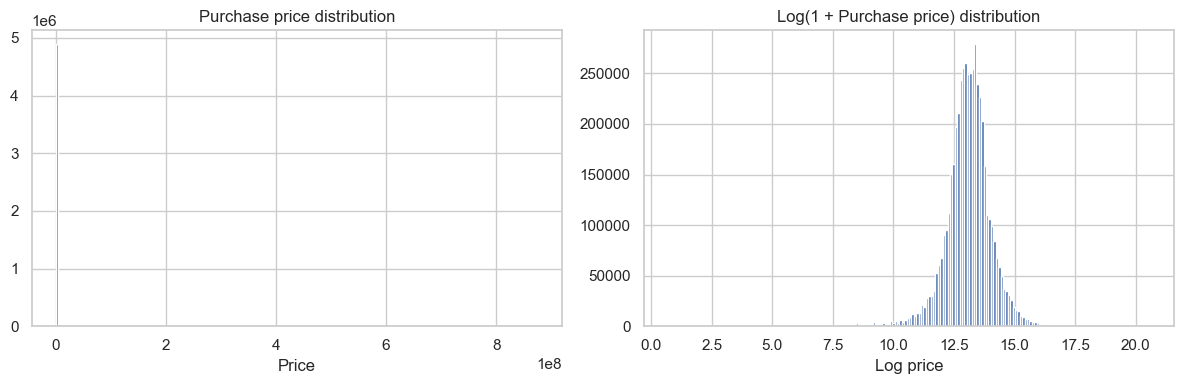

In [9]:
df['Purchase price'].describe()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(df['Purchase price'].dropna(), bins=200)
plt.title('Purchase price distribution')
plt.xlabel('Price')


plt.subplot(1,2,2)
plt.hist(np.log1p(df['Purchase price'].dropna()), bins=200)
plt.title('Log(1 + Purchase price) distribution')
plt.xlabel('Log price')
plt.tight_layout()

df.sort_values('Purchase price', ascending=False).head(10)[['Address', 'Property locality', 'Purchase price', 'Zoning', 'Primary purpose']]

Outliers:
    Could be a result of an input error when logging the data
    These values will be removed

In [10]:
print(df['Primary purpose'].unique())
print(df['Primary purpose'].value_counts())


['Farm' 'Residence' 'Vacant Land' 'Home Unit' 'Commercial' 'Shop']
Primary purpose
Residence      4173276
Vacant Land     576139
Commercial       92780
Farm             62437
Home Unit        23069
Shop             20787
Name: count, dtype: int64
